
# Treinamento de Modelos de Regressão

Este notebook utiliza o arquivo **history_advanced.csv** para treinar os seguintes modelos:
- Regressão Linear
- Árvore de Decisão
- Gradient Boosting
- Rede Neural (MLP)

**Observação:** Assume-se que a **última coluna do CSV é a variável alvo (y)** e as demais são variáveis de entrada (X).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

In [3]:
df = pd.read_csv("history_advanced_complete.csv")
df = df.drop(columns=['Individual_ID', 'Generation'])

df.describe()

,Fitness,Gene_0_0,Gene_0_1,Gene_0_2,Gene_0_3,Gene_0_4,Gene_0_5,Gene_0_6,Gene_0_7,Gene_0_8,...,Gene_19_10,Gene_19_11,Gene_19_12,Gene_19_13,Gene_19_14,Gene_19_15,Gene_19_16,Gene_19_17,Gene_19_18,Gene_19_19
count,1.000100e+06,1.000100e+06,1.000100e+06,1.000100e+06,1000100.0,1.000100e+06,1000100.0,1.000100e+06,1.000100e+06,1.000100e+06,...,1.000100e+06,1.000100e+06,1.000100e+06,1.000100e+06,1.000100e+06,1.000100e+06,1.000100e+06,1.000100e+06,1.000100e+06,1.000100e+06
mean,1.134191e-01,9.998830e-01,1.099890e-04,9.999000e-06,0.0,8.999100e-06,0.0,2.999700e-06,8.999100e-06,3.999600e-06,...,8.999100e-06,3.899610e-05,1.119888e-04,1.499850e-05,9.993031e-01,8.999100e-06,1.899810e-05,1.799820e-05,2.669733e-04,9.998990e-01
std,3.057435e-03,1.081549e-02,1.048699e-02,3.162105e-03,0.0,2.999838e-03,0.0,1.731962e-03,2.999838e-03,1.999897e-03,...,2.999838e-03,6.244567e-03,1.058189e-02,3.872763e-03,2.639025e-02,2.999838e-03,4.358642e-03,4.242393e-03,1.633714e-02,1.004887e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.118410e-01,1.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,1.135160e-01,1.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.151650e-01,1.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,1.208350e-01,1.000000e+00,1.000000e+00,1.000000e+00,0.0,1.000000e+00,0.0,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [4]:
df = df.drop_duplicates()

In [5]:
df.describe()

,Fitness,Gene_0_0,Gene_0_1,Gene_0_2,Gene_0_3,Gene_0_4,Gene_0_5,Gene_0_6,Gene_0_7,Gene_0_8,...,Gene_19_10,Gene_19_11,Gene_19_12,Gene_19_13,Gene_19_14,Gene_19_15,Gene_19_16,Gene_19_17,Gene_19_18,Gene_19_19
count,1660.000000,1660.000000,1660.000000,1660.000000,1660.0,1660.000000,1660.0,1660.000000,1660.000000,1660.000000,...,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000
mean,0.098689,0.963855,0.057229,0.003614,0.0,0.004217,0.0,0.001205,0.003012,0.001807,...,0.003614,0.012048,0.019880,0.004217,0.746988,0.003012,0.006024,0.009036,0.113855,0.969277
std,0.030706,0.186706,0.232349,0.060030,0.0,0.064820,0.0,0.034700,0.054816,0.042486,...,0.060030,0.109134,0.139628,0.064820,0.434869,0.054816,0.077404,0.094657,0.317731,0.172618
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.100910,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.112264,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.114743,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,0.120835,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.head()

,Fitness,Gene_0_0,Gene_0_1,Gene_0_2,Gene_0_3,Gene_0_4,Gene_0_5,Gene_0_6,Gene_0_7,Gene_0_8,...,Gene_19_10,Gene_19_11,Gene_19_12,Gene_19_13,Gene_19_14,Gene_19_15,Gene_19_16,Gene_19_17,Gene_19_18,Gene_19_19
0,0.044988,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,0.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0.000000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.000000,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


Estatísticas Descritivas da Variável Alvo (GenerationBestFitness):
count    1660.000000
mean        0.098689
std         0.030706
min         0.000000
25%         0.100910
50%         0.112264
75%         0.114743
max         0.120835
Name: Fitness, dtype: float64


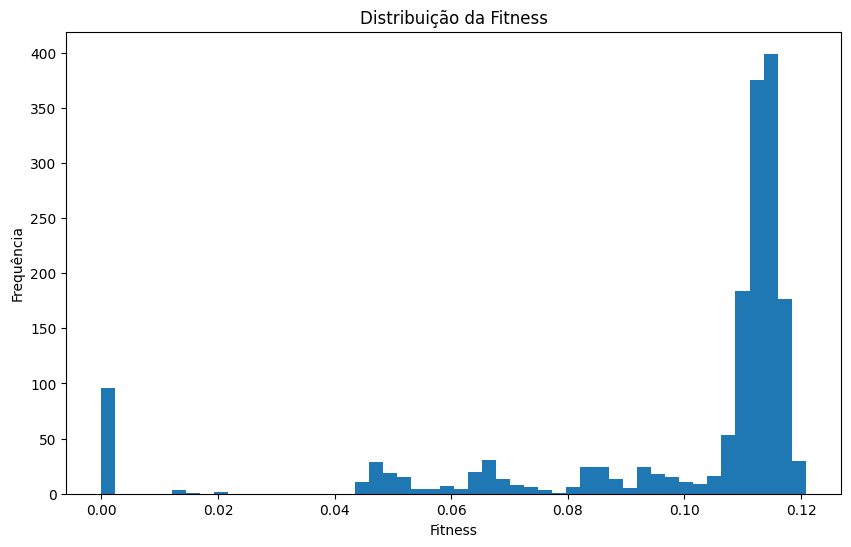

In [7]:
print("Estatísticas Descritivas da Variável Alvo (GenerationBestFitness):")
print(df['Fitness'].describe())

plt.figure(figsize=(10, 6))
df['Fitness'].hist(bins=50)
plt.title('Distribuição da Fitness')
plt.xlabel('Fitness')
plt.ylabel('Frequência')
plt.grid(False)
plt.show()

In [8]:
X = df.drop(columns=['Fitness'])
X.head()

,Gene_0_0,Gene_0_1,Gene_0_2,Gene_0_3,Gene_0_4,Gene_0_5,Gene_0_6,Gene_0_7,Gene_0_8,Gene_0_9,...,Gene_19_10,Gene_19_11,Gene_19_12,Gene_19_13,Gene_19_14,Gene_19_15,Gene_19_16,Gene_19_17,Gene_19_18,Gene_19_19
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [9]:
y = df['Fitness']
y.head()

0    0.044988
1    0.000000
2    0.000000
3    0.000000
4    0.000000
Name: Fitness, dtype: float64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [16]:
def evaluate_and_plot(model_name, y_true, y_pred):
    """Calcula métricas de regressão, plota valores reais vs. preditos e gráficos de resíduos."""

    # Cálculo das Métricas
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    # Impressão das Métricas
    print(f"--- {model_name} Métricas ---")
    print(f"MSE: {mse:.6e}")
    print(f"RMSE: {rmse:.6e}")
    print(f"MAE: {mae:.6e}")
    print(f"R2: {r2:.4f}")

    # Cálculo dos Resíduos
    residuals = y_true - y_pred

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Intervalo real dos dados
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())

    # --- 1. Valores Reais vs Preditos ---
    axes[0].scatter(y_true, y_pred, alpha=0.5, label='Predição')
    axes[0].plot([min_val, max_val], [min_val, max_val], 'r--', label='y = x')

    axes[0].set_xlim(min_val, max_val)
    axes[0].set_ylim(min_val, max_val)

    axes[0].set_title(f'Valores Reais vs. Preditos ({model_name})')
    axes[0].set_xlabel('Valor Real')
    axes[0].set_ylabel('Valor Predito')
    axes[0].legend()
    axes[0].grid(True, linestyle='--')

    # --- 2. Gráfico de Resíduos ---
    axes[1].scatter(y_pred, residuals, alpha=0.5)

    axes[1].hlines(
        y=0,
        xmin=y_pred.min(),
        xmax=y_pred.max(),
        colors='red',
        linestyles='--'
    )

    axes[1].set_xlim(y_pred.min(), y_pred.max())
    axes[1].set_ylim(residuals.min(), residuals.max())

    axes[1].set_title(f'Gráfico de Resíduos ({model_name})')
    axes[1].set_xlabel('Valor Predito')
    axes[1].set_ylabel('Resíduo')
    axes[1].grid(True, linestyle='--')

    plt.tight_layout()
    plt.show()


## Regressão Linear

--- Regressão Linear Métricas ---
MSE: 4.600596e-04
RMSE: 2.144900e-02
MAE: 6.660247e-03
R2: 0.4403


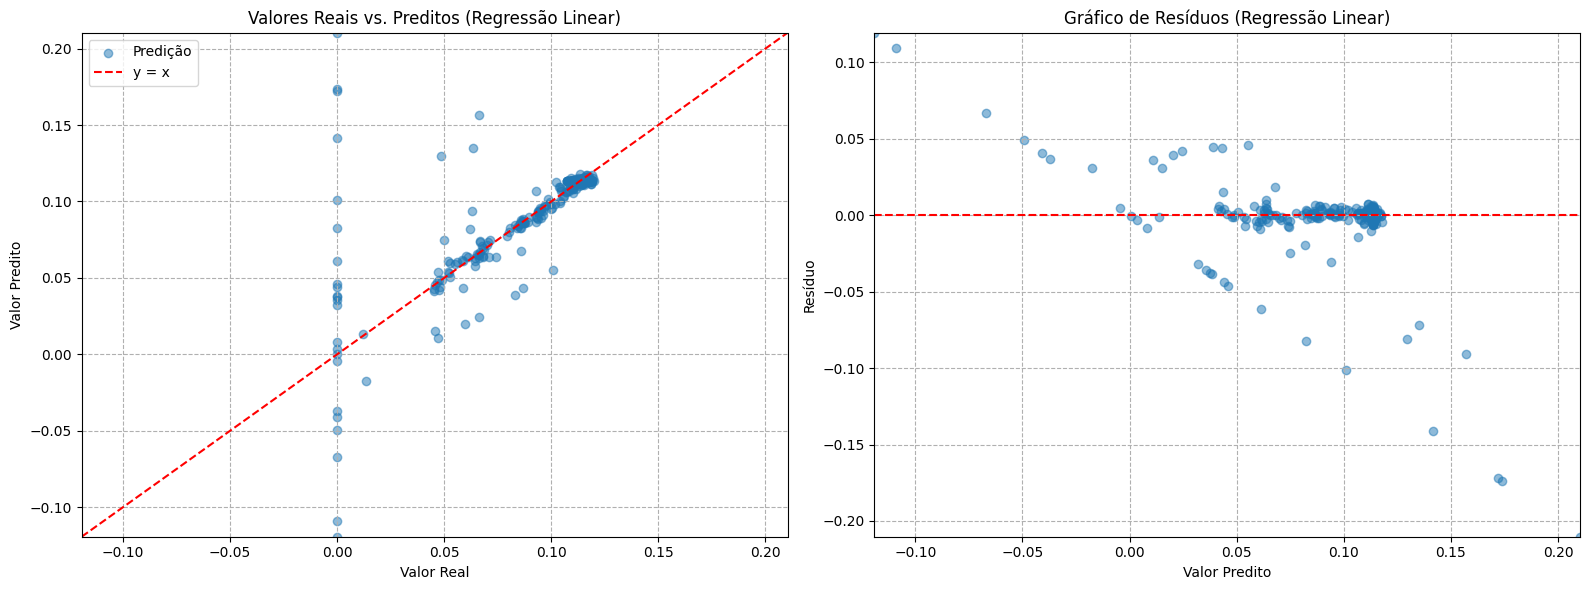

In [17]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

evaluate_and_plot("Regressão Linear", y_test, y_pred_lr)

## Árvore de Decisão

--- Árvore de Decisão Métricas ---
MSE: 3.625694e-05
RMSE: 6.021373e-03
MAE: 2.759135e-03
R2: 0.9559


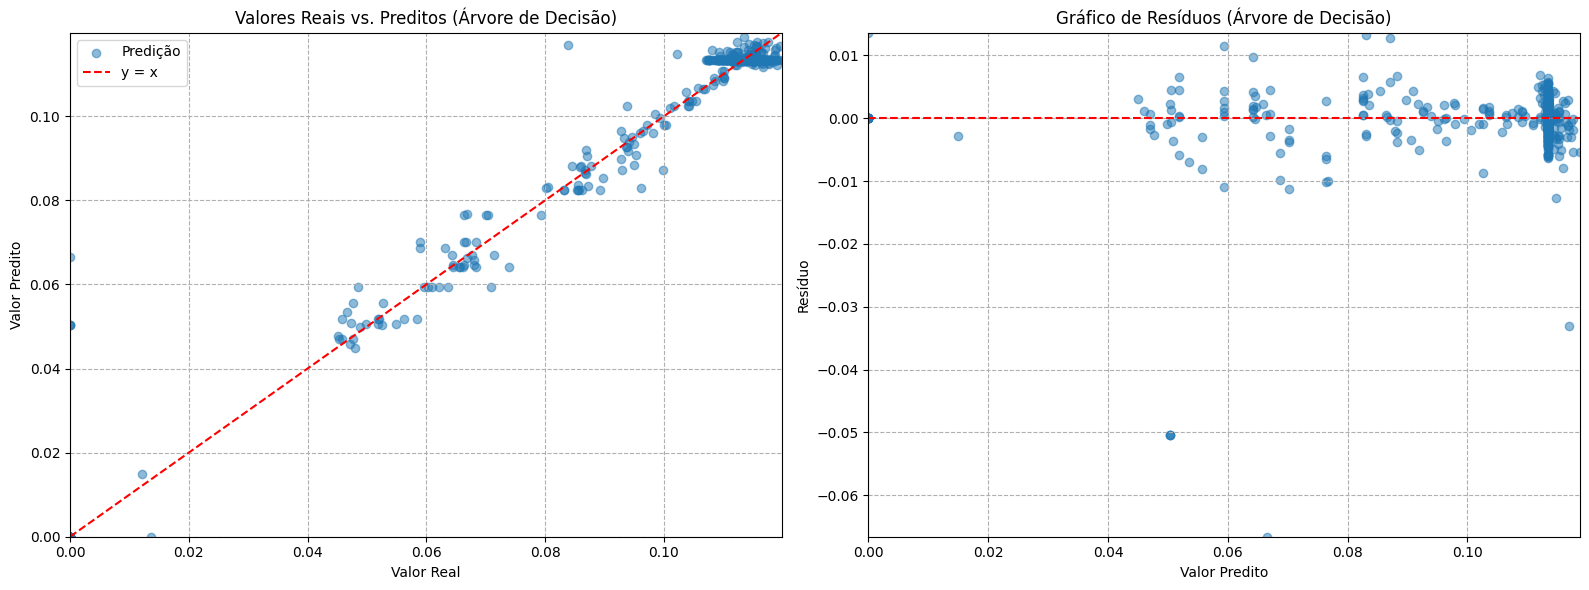

In [18]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

evaluate_and_plot("Árvore de Decisão", y_test, y_pred_dt)

## Gradient Boosting

--- Gradient Boosting Métricas ---
MSE: 2.187564e-05
RMSE: 4.677140e-03
MAE: 2.878445e-03
R2: 0.9734


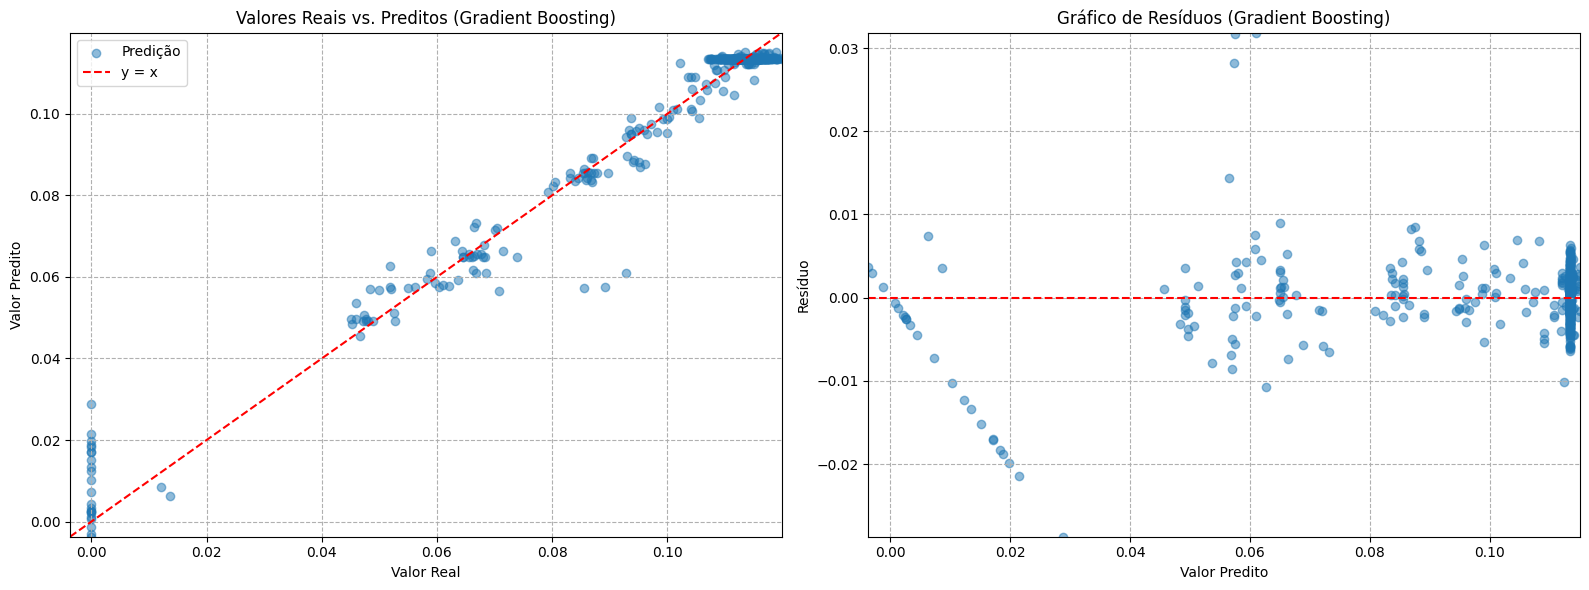

In [19]:
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

evaluate_and_plot("Gradient Boosting", y_test, y_pred_gb)

## Rede Neural (MLP)

--- Rede Neural (MLP) Métricas ---
MSE: 1.564448e-04
RMSE: 1.250779e-02
MAE: 7.034927e-03
R2: 0.8097


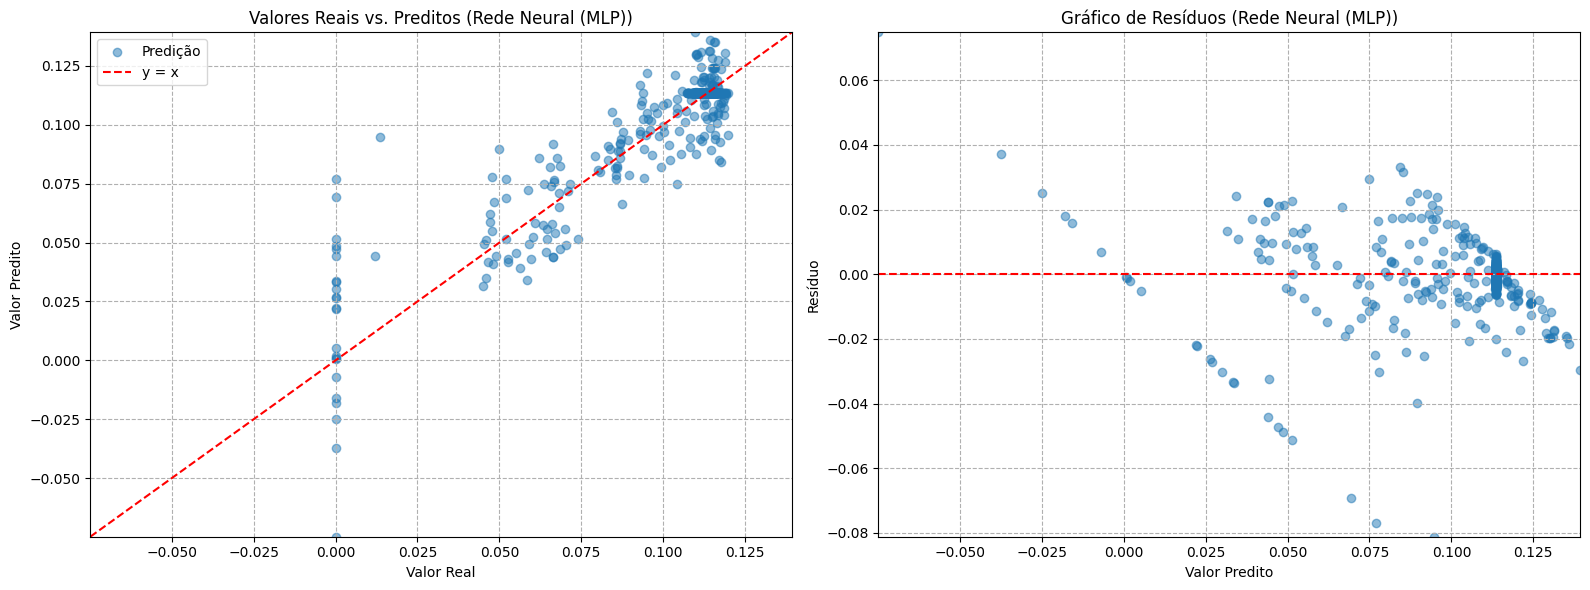

In [20]:
mlp = MLPRegressor(
    hidden_layer_sizes=(len(X.columns), len(X.columns)*2),
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
)

mlp.fit(X_train, y_train)

y_pred_mlp = mlp.predict(X_test)

evaluate_and_plot("Rede Neural (MLP)", y_test, y_pred_mlp)